In [1]:
import pandas as pd
import numpy as np
import fastquant
import datetime
import requests
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pytrends.request import TrendReq 
import hvplot.pandas

%matplotlib inline

In [2]:
from collections import Counter
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier

In [3]:
def save_as_png(name,ax):
	ax.set_title(name)
	ax.figure.savefig(f'Images/{name}.png')

In [4]:
# datetime.date.today()
today = date.today().strftime("%Y-%m-%d")
y_end = int(today.split('-')[0])
m_end = int(today.split('-')[1])
d_end = int(today.split('-')[2])
today

'2022-06-11'

In [5]:
date_start = "2021-06-10"
date_end = "2022-06-11"

In [6]:
start = datetime.datetime.strptime(date_start, '%Y-%m-%d')
end = datetime.datetime.strptime(today, '%Y-%m-%d')

total_days = end - start
total_days = total_days.days
total_days

366

In [7]:
BTC_1 = fastquant.get_crypto_data("BTC/USDT", date_start, date_end)
ETH_1 = fastquant.get_crypto_data("ETH/USDT", date_start, date_end)
ADA_1 = fastquant.get_crypto_data("ADA/USDT", date_start, date_end)

# Multi Index
BTC_1.columns = pd.MultiIndex.from_product([['BTC_1'], BTC_1.columns])
ETH_1.columns = pd.MultiIndex.from_product([['ETH_1'], ETH_1.columns])
ADA_1.columns = pd.MultiIndex.from_product([['ADA_1'], ADA_1.columns])

# Combine Crypto Info
price_data = pd.concat([BTC_1, ETH_1, ADA_1], axis=1)
price_data = price_data.dropna()
# price_data.head()

In [8]:
df_price = price_data.drop([
	('BTC_1', 'open'), ('BTC_1', 'high'), ('BTC_1', 'low'),
	('ETH_1', 'open'), ('ETH_1', 'high'), ('ETH_1', 'low'),
	('ADA_1', 'open'), ('ADA_1', 'high'), ('ADA_1', 'low'),
], axis=1)

df_price

BTC_1                   ETH_1                 ADA_1  \
               close         volume    close        volume   close   
dt                                                                   
2021-06-11  37331.98   78466.005300  2354.01  5.873643e+05  1.4371   
2021-06-12  35546.11   87717.549990  2370.74  7.674395e+05  1.4789   
2021-06-13  39020.57   86921.025555  2509.33  7.159488e+05  1.5566   
2021-06-14  40516.29  108522.391949  2580.77  6.841836e+05  1.5769   
2021-06-15  40144.04   80679.622838  2543.54  5.998266e+05  1.5552   
...              ...            ...      ...           ...     ...   
2022-06-07  31125.33  110674.516580  1813.33  1.397598e+06  0.6141   
2022-06-08  30204.77   68542.612760  1791.88  9.415101e+05  0.6408   
2022-06-09  30109.93   46291.186500  1788.81  5.353110e+05  0.6323   
2022-06-10  29091.88   76204.249800  1662.91  9.550358e+05  0.5744   
2022-06-11  28696.01   35564.687670  1563.79  6.054155e+05  0.5720   

                          
                  volume  
dt                        
2021-06-11  3.231013e+08  
2021-06-12  3.629652e+08  
2021-06-13  3.307223e+08  
2021-06-14  2.807912e+08  
2021-06-15  2.161591e+08  
...                  ...  
2022-06-07  3.388123e+08  
2022-06-08  3.942674e+08  
2022-06-09  1.923109e+08  
2022-06-10  2.722638e+08  
2022-06-11  1.616791e+08  

[366 rows x 6 columns]

In [9]:
df_price.index = df_price.index.rename('Date')
df_price

BTC_1                   ETH_1                 ADA_1  \
               close         volume    close        volume   close   
Date                                                                 
2021-06-11  37331.98   78466.005300  2354.01  5.873643e+05  1.4371   
2021-06-12  35546.11   87717.549990  2370.74  7.674395e+05  1.4789   
2021-06-13  39020.57   86921.025555  2509.33  7.159488e+05  1.5566   
2021-06-14  40516.29  108522.391949  2580.77  6.841836e+05  1.5769   
2021-06-15  40144.04   80679.622838  2543.54  5.998266e+05  1.5552   
...              ...            ...      ...           ...     ...   
2022-06-07  31125.33  110674.516580  1813.33  1.397598e+06  0.6141   
2022-06-08  30204.77   68542.612760  1791.88  9.415101e+05  0.6408   
2022-06-09  30109.93   46291.186500  1788.81  5.353110e+05  0.6323   
2022-06-10  29091.88   76204.249800  1662.91  9.550358e+05  0.5744   
2022-06-11  28696.01   35564.687670  1563.79  6.054155e+05  0.5720   

                          
                  volume  
Date                      
2021-06-11  3.231013e+08  
2021-06-12  3.629652e+08  
2021-06-13  3.307223e+08  
2021-06-14  2.807912e+08  
2021-06-15  2.161591e+08  
...                  ...  
2022-06-07  3.388123e+08  
2022-06-08  3.942674e+08  
2022-06-09  1.923109e+08  
2022-06-10  2.722638e+08  
2022-06-11  1.616791e+08  

[366 rows x 6 columns]

In [10]:
url = f"https://api.alternative.me/fng/?limit={total_days}"
response = requests.get(url)
response.raise_for_status()
data = response.json()

In [11]:
rows = []
for i in range(total_days):
	FG_index = data['data'][i]['value']
	fear_classification = data['data'][i]['value_classification']
	t = int(data['data'][i]['timestamp'])
	t = datetime.datetime.fromtimestamp(t).strftime('%Y-%m-%d')
	rows.append([t, FG_index, fear_classification])

df = pd.DataFrame(rows,columns=['Date', 'FG_index', "Fear_Classification"])
df.set_index("Date", inplace=True)
df.sort_index(ascending=True, inplace=True)
df.index = pd.to_datetime(df.index)
df_fear = df.copy()
df_fear

FG_index Fear_Classification
Date                                   
2021-06-10       21        Extreme Fear
2021-06-11       28                Fear
2021-06-12       23        Extreme Fear
2021-06-13       28                Fear
2021-06-14       38                Fear
...             ...                 ...
2022-06-06       15        Extreme Fear
2022-06-07       17        Extreme Fear
2022-06-08       11        Extreme Fear
2022-06-09       13        Extreme Fear
2022-06-10       12        Extreme Fear

[366 rows x 2 columns]

In [12]:
df_fear.index

DatetimeIndex(['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-19',
               ...
               '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
               '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [13]:
df = pd.concat([df_fear, df_price], axis=1, join='inner')
df.rename(columns=''.join, inplace=True)
df.rename(columns={
"BTC_1close":"BTC_close",
"BTC_1volume":"BTC_volume",
"ETH_1close":"ETH_close",
"ETH_1volume":"ETH_volume",
"ADA_1close":"ADA_close",
"ADA_1volume":"ADA_volume",
}, inplace=True)
df

FG_index Fear_Classification  BTC_close     BTC_volume  ETH_close  \
Date                                                                           
2021-06-11       28                Fear   37331.98   78466.005300    2354.01   
2021-06-12       23        Extreme Fear   35546.11   87717.549990    2370.74   
2021-06-13       28                Fear   39020.57   86921.025555    2509.33   
2021-06-14       38                Fear   40516.29  108522.391949    2580.77   
2021-06-15       33                Fear   40144.04   80679.622838    2543.54   
...             ...                 ...        ...            ...        ...   
2022-06-06       15        Extreme Fear   31373.10   68836.924560    1859.84   
2022-06-07       17        Extreme Fear   31125.33  110674.516580    1813.33   
2022-06-08       11        Extreme Fear   30204.77   68542.612760    1791.88   
2022-06-09       13        Extreme Fear   30109.93   46291.186500    1788.81   
2022-06-10       12        Extreme Fear   29091.88   76204.249800    1662.91   

              ETH_volume  ADA_close    ADA_volume  
Date                                               
2021-06-11  5.873643e+05     1.4371  3.231013e+08  
2021-06-12  7.674395e+05     1.4789  3.629652e+08  
2021-06-13  7.159488e+05     1.5566  3.307223e+08  
2021-06-14  6.841836e+05     1.5769  2.807912e+08  
2021-06-15  5.998266e+05     1.5552  2.161591e+08  
...                  ...        ...           ...  
2022-06-06  8.042504e+05     0.6091  3.415024e+08  
2022-06-07  1.397598e+06     0.6141  3.388123e+08  
2022-06-08  9.415101e+05     0.6408  3.942674e+08  
2022-06-09  5.353110e+05     0.6323  1.923109e+08  
2022-06-10  9.550358e+05     0.5744  2.722638e+08  

[365 rows x 8 columns]

In [14]:
pytrend = TrendReq()
kw_list=['Bitcoin', 'Ethereum', 'Cardano']
df_hist = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=6, day_start=1, year_end=y_end, month_end=m_end, day_end=d_end, cat=0, geo='', gprop='', sleep=1, frequency='daily')

In [15]:
df_hist.index = df_hist.index.rename("Date")
df_hist.drop(["isPartial"], axis = 1, inplace=True)
df_hist

Bitcoin  Ethereum  Cardano
Date                                  
2020-06-01       11         1        0
2020-06-02       16         2        0
2020-06-03       13         1        0
2020-06-04       12         1        0
2020-06-05       12         1        0
...             ...       ...      ...
2022-06-05       26         5        1
2022-06-06       31         5        2
2022-06-07       33         6        2
2022-06-08       30         5        2
2022-06-09        0         0        0

[741 rows x 3 columns]

In [16]:
dfh = df_hist.rename(columns={"Bitcoin":"BTC_searches", "Ethereum":"ETH_searches", "Cardano":"ADA_searches"})
dfh

BTC_searches  ETH_searches  ADA_searches
Date                                                
2020-06-01            11             1             0
2020-06-02            16             2             0
2020-06-03            13             1             0
2020-06-04            12             1             0
2020-06-05            12             1             0
...                  ...           ...           ...
2022-06-05            26             5             1
2022-06-06            31             5             2
2022-06-07            33             6             2
2022-06-08            30             5             2
2022-06-09             0             0             0

[741 rows x 3 columns]

In [17]:
df_complete = df.join(dfh, on=df.index, how='inner')
df_complete.drop('key_0', inplace=True, axis=1)
df_complete

FG_index Fear_Classification  BTC_close     BTC_volume  ETH_close  \
Date                                                                           
2021-06-11       28                Fear   37331.98   78466.005300    2354.01   
2021-06-12       23        Extreme Fear   35546.11   87717.549990    2370.74   
2021-06-13       28                Fear   39020.57   86921.025555    2509.33   
2021-06-14       38                Fear   40516.29  108522.391949    2580.77   
2021-06-15       33                Fear   40144.04   80679.622838    2543.54   
...             ...                 ...        ...            ...        ...   
2022-06-05       13        Extreme Fear   29919.21   23139.928100    1806.23   
2022-06-06       15        Extreme Fear   31373.10   68836.924560    1859.84   
2022-06-07       17        Extreme Fear   31125.33  110674.516580    1813.33   
2022-06-08       11        Extreme Fear   30204.77   68542.612760    1791.88   
2022-06-09       13        Extreme Fear   30109.93   46291.186500    1788.81   

              ETH_volume  ADA_close    ADA_volume  BTC_searches  ETH_searches  \
Date                                                                            
2021-06-11  5.873643e+05     1.4371  3.231013e+08            29             5   
2021-06-12  7.674395e+05     1.4789  3.629652e+08            24             5   
2021-06-13  7.159488e+05     1.5566  3.307223e+08            25             5   
2021-06-14  6.841836e+05     1.5769  2.807912e+08            32             5   
2021-06-15  5.998266e+05     1.5552  2.161591e+08            26             5   
...                  ...        ...           ...           ...           ...   
2022-06-05  3.719745e+05     0.5674  9.527759e+07            26             5   
2022-06-06  8.042504e+05     0.6091  3.415024e+08            31             5   
2022-06-07  1.397598e+06     0.6141  3.388123e+08            33             6   
2022-06-08  9.415101e+05     0.6408  3.942674e+08            30             5   
2022-06-09  5.353110e+05     0.6323  1.923109e+08             0             0   

            ADA_searches  
Date                      
2021-06-11             1  
2021-06-12             1  
2021-06-13             1  
2021-06-14             1  
2021-06-15             1  
...                  ...  
2022-06-05             1  
2022-06-06             2  
2022-06-07             2  
2022-06-08             2  
2022-06-09             0  

[365 rows x 11 columns]

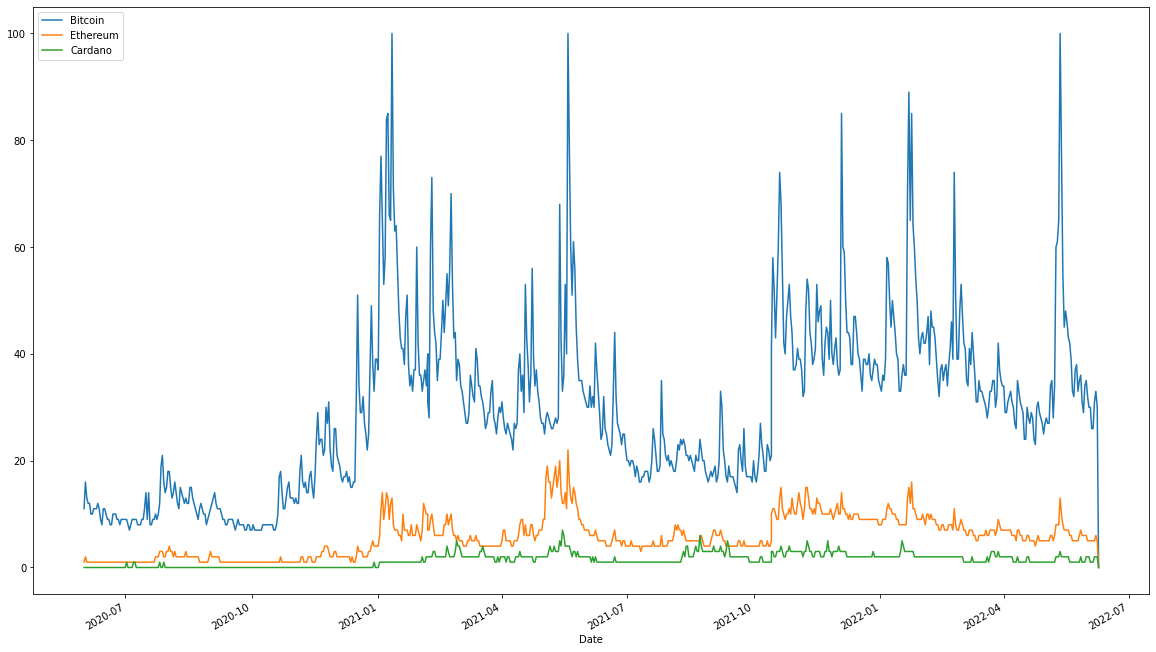

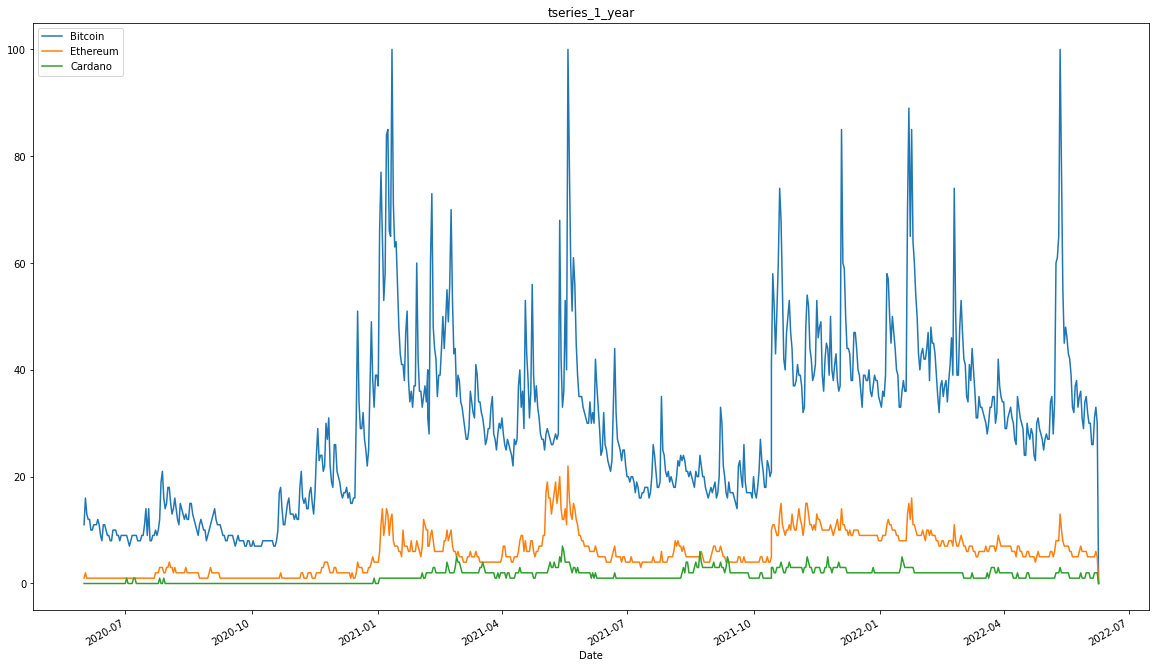

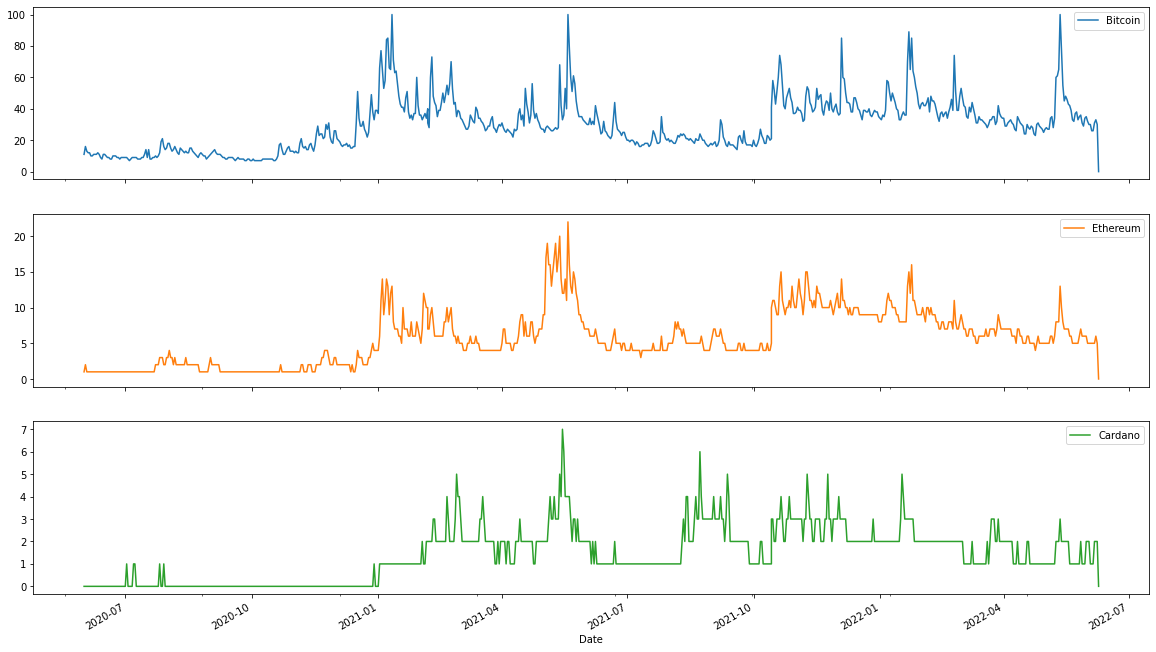

In [18]:
#visualise
#plot a timeseries chart
df_hist.plot(figsize=(20, 12))

png_figsize =(20,12)

time_series_1_year = df_hist.plot(figsize=png_figsize)
save_as_png("tseries_1_year",time_series_1_year)

#plot seperate graphs, using theprovided keywords
time_series_1_year_subplots = df_hist.plot(subplots=True, figsize=(20, 12));

In [19]:
df_complete['FG_index'] = df_complete['FG_index'].astype('int64')

In [20]:
df_complete.drop('Fear_Classification', inplace=True, axis=1)
df_complete

FG_index  BTC_close     BTC_volume  ETH_close    ETH_volume  \
Date                                                                      
2021-06-11        28   37331.98   78466.005300    2354.01  5.873643e+05   
2021-06-12        23   35546.11   87717.549990    2370.74  7.674395e+05   
2021-06-13        28   39020.57   86921.025555    2509.33  7.159488e+05   
2021-06-14        38   40516.29  108522.391949    2580.77  6.841836e+05   
2021-06-15        33   40144.04   80679.622838    2543.54  5.998266e+05   
...              ...        ...            ...        ...           ...   
2022-06-05        13   29919.21   23139.928100    1806.23  3.719745e+05   
2022-06-06        15   31373.10   68836.924560    1859.84  8.042504e+05   
2022-06-07        17   31125.33  110674.516580    1813.33  1.397598e+06   
2022-06-08        11   30204.77   68542.612760    1791.88  9.415101e+05   
2022-06-09        13   30109.93   46291.186500    1788.81  5.353110e+05   

            ADA_close    ADA_volume  BTC_searches  ETH_searches  ADA_searches  
Date                                                                           
2021-06-11     1.4371  3.231013e+08            29             5             1  
2021-06-12     1.4789  3.629652e+08            24             5             1  
2021-06-13     1.5566  3.307223e+08            25             5             1  
2021-06-14     1.5769  2.807912e+08            32             5             1  
2021-06-15     1.5552  2.161591e+08            26             5             1  
...               ...           ...           ...           ...           ...  
2022-06-05     0.5674  9.527759e+07            26             5             1  
2022-06-06     0.6091  3.415024e+08            31             5             2  
2022-06-07     0.6141  3.388123e+08            33             6             2  
2022-06-08     0.6408  3.942674e+08            30             5             2  
2022-06-09     0.6323  1.923109e+08             0             0             0  

[365 rows x 10 columns]

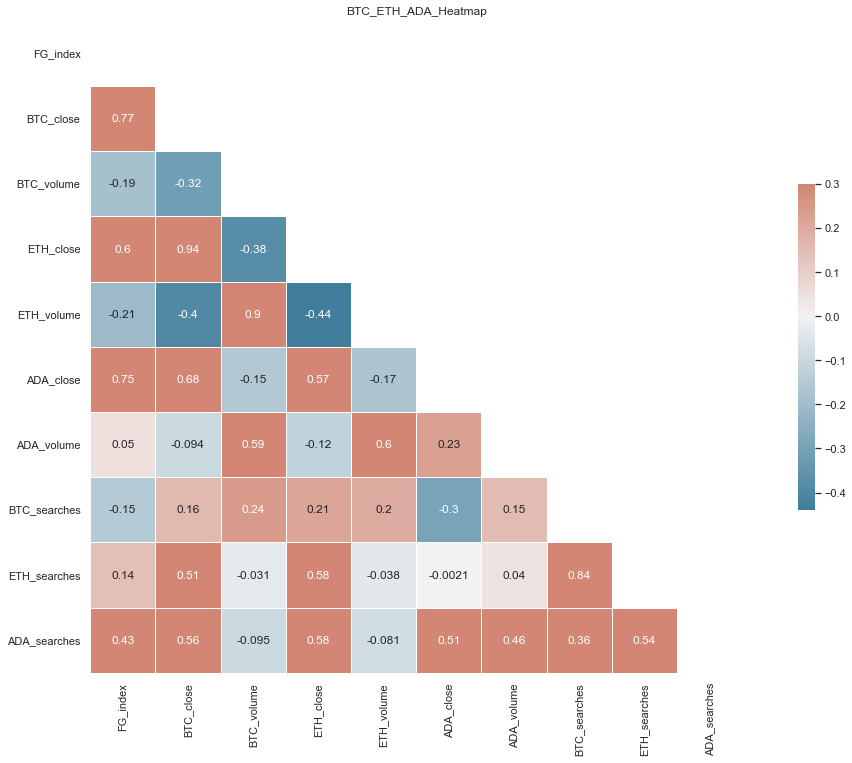

In [21]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_complete.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=png_figsize)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap_btc_eth_ada = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

save_as_png("BTC_ETH_ADA_Heatmap", heatmap_btc_eth_ada)

In [22]:
df_complete

FG_index  BTC_close     BTC_volume  ETH_close    ETH_volume  \
Date                                                                      
2021-06-11        28   37331.98   78466.005300    2354.01  5.873643e+05   
2021-06-12        23   35546.11   87717.549990    2370.74  7.674395e+05   
2021-06-13        28   39020.57   86921.025555    2509.33  7.159488e+05   
2021-06-14        38   40516.29  108522.391949    2580.77  6.841836e+05   
2021-06-15        33   40144.04   80679.622838    2543.54  5.998266e+05   
...              ...        ...            ...        ...           ...   
2022-06-05        13   29919.21   23139.928100    1806.23  3.719745e+05   
2022-06-06        15   31373.10   68836.924560    1859.84  8.042504e+05   
2022-06-07        17   31125.33  110674.516580    1813.33  1.397598e+06   
2022-06-08        11   30204.77   68542.612760    1791.88  9.415101e+05   
2022-06-09        13   30109.93   46291.186500    1788.81  5.353110e+05   

            ADA_close    ADA_volume  BTC_searches  ETH_searches  ADA_searches  
Date                                                                           
2021-06-11     1.4371  3.231013e+08            29             5             1  
2021-06-12     1.4789  3.629652e+08            24             5             1  
2021-06-13     1.5566  3.307223e+08            25             5             1  
2021-06-14     1.5769  2.807912e+08            32             5             1  
2021-06-15     1.5552  2.161591e+08            26             5             1  
...               ...           ...           ...           ...           ...  
2022-06-05     0.5674  9.527759e+07            26             5             1  
2022-06-06     0.6091  3.415024e+08            31             5             2  
2022-06-07     0.6141  3.388123e+08            33             6             2  
2022-06-08     0.6408  3.942674e+08            30             5             2  
2022-06-09     0.6323  1.923109e+08             0             0             0  

[365 rows x 10 columns]

In [23]:
# df['FG_index'].dtype#.mean()
fear_mean = pd.DataFrame(df_complete["FG_index"])
fear_mean.mean()
fear_mean.max()
fear_mean.min()
fear_mean.std()

fearful_1 = fear_mean.mean() - fear_mean.std()
greedy_1 = fear_mean.mean() + fear_mean.std()

# fearful_1 = fear_mean.mean() - (0.5*fear_mean.std())
# greedy_1 = fear_mean.mean() + (0.5*fear_mean.std())

In [24]:
fearful_1 # sell when this value is exceeded
greedy_1 # buy when below this value

FG_index    59.335305
dtype: float64

In [25]:
df_ada = df_complete.drop(columns=["BTC_close", "BTC_volume", "ETH_close", "ETH_volume", "BTC_searches", "ETH_searches"])
df_ada

FG_index  ADA_close    ADA_volume  ADA_searches
Date                                                       
2021-06-11        28     1.4371  3.231013e+08             1
2021-06-12        23     1.4789  3.629652e+08             1
2021-06-13        28     1.5566  3.307223e+08             1
2021-06-14        38     1.5769  2.807912e+08             1
2021-06-15        33     1.5552  2.161591e+08             1
...              ...        ...           ...           ...
2022-06-05        13     0.5674  9.527759e+07             1
2022-06-06        15     0.6091  3.415024e+08             2
2022-06-07        17     0.6141  3.388123e+08             2
2022-06-08        11     0.6408  3.942674e+08             2
2022-06-09        13     0.6323  1.923109e+08             0

[365 rows x 4 columns]

In [26]:
df_ada["s_signal"] = 0

In [27]:
 # Create the signal to buy
df_ada.loc[(df_ada["FG_index"] <= float(fearful_1)), "s_signal"] = 1
df_ada.loc[(df_ada["FG_index"] >= float(greedy_1)), "s_signal"] = -1
df_ada

FG_index  ADA_close    ADA_volume  ADA_searches  s_signal
Date                                                                 
2021-06-11        28     1.4371  3.231013e+08             1         0
2021-06-12        23     1.4789  3.629652e+08             1         0
2021-06-13        28     1.5566  3.307223e+08             1         0
2021-06-14        38     1.5769  2.807912e+08             1         0
2021-06-15        33     1.5552  2.161591e+08             1         0
...              ...        ...           ...           ...       ...
2022-06-05        13     0.5674  9.527759e+07             1         1
2022-06-06        15     0.6091  3.415024e+08             2         1
2022-06-07        17     0.6141  3.388123e+08             2         0
2022-06-08        11     0.6408  3.942674e+08             2         1
2022-06-09        13     0.6323  1.923109e+08             0         1

[365 rows x 5 columns]

In [28]:
# Calculate the daily returns using the closing prices and the pct_change function
df_ada["actual_returns"] = df_ada["ADA_close"].pct_change()

# Drop all NaN values from the DataFrame
df_ada = df_ada.dropna()

# Review the DataFrame
df_ada

FG_index  ADA_close    ADA_volume  ADA_searches  s_signal  \
Date                                                                    
2021-06-12        23     1.4789  3.629652e+08             1         0   
2021-06-13        28     1.5566  3.307223e+08             1         0   
2021-06-14        38     1.5769  2.807912e+08             1         0   
2021-06-15        33     1.5552  2.161591e+08             1         0   
2021-06-16        26     1.4851  2.035805e+08             1         0   
...              ...        ...           ...           ...       ...   
2022-06-05        13     0.5674  9.527759e+07             1         1   
2022-06-06        15     0.6091  3.415024e+08             2         1   
2022-06-07        17     0.6141  3.388123e+08             2         0   
2022-06-08        11     0.6408  3.942674e+08             2         1   
2022-06-09        13     0.6323  1.923109e+08             0         1   

            actual_returns  
Date                        
2021-06-12        0.029086  
2021-06-13        0.052539  
2021-06-14        0.013041  
2021-06-15       -0.013761  
2021-06-16       -0.045075  
...                    ...  
2022-06-05        0.001589  
2022-06-06        0.073493  
2022-06-07        0.008209  
2022-06-08        0.043478  
2022-06-09       -0.013265  

[364 rows x 6 columns]

In [29]:
# ADA features
X = df_ada.drop(columns="s_signal")

# Create ADA target
y = df_ada["s_signal"]

In [30]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
X_train

FG_index  ADA_close    ADA_volume  ADA_searches  actual_returns
Date                                                                       
2021-08-09        71     1.4745  2.043931e+08             1        0.034374
2021-11-17        54     1.8760  2.079852e+08             3        0.001067
2022-02-10        50     1.1500  1.836045e+08             2       -0.037657
2022-01-10        21     1.1230  1.892506e+08             2       -0.040171
2021-11-08        84     2.1250  1.899745e+08             3        0.051460
...              ...        ...           ...           ...             ...
2021-12-31        21     1.3080  1.206123e+08             2       -0.037528
2022-02-21        20     0.8560  2.834885e+08             2       -0.080559
2021-08-23        79     2.9152  6.537071e+08             6        0.077748
2022-02-01        28     1.0960  1.245263e+08             2        0.042816
2021-07-19        19     1.1225  1.386467e+08             1       -0.049776

[273 rows x 5 columns]

In [32]:
# Create the StandardScaler instance
scaler = StandardScaler()

X_scaled = scaler.fit(X_train) # Fit the Standard Scaler with the training data

X_train_scaled = X_scaled.transform(X_train) # Scale the training and testing data
X_test_scaled = X_scaled.transform(X_test)

In [33]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions#[:10]
training_signal_predictions.shape

(273,)

In [34]:
# Create the StandardScaler instance
X_scaled = scaler.fit(X) # Fit the Standard Scaler with the training data

X = X_scaled.transform(X) # Scale the training and testing data
X

array([[-0.69517649,  0.08010906,  1.01432501, -1.02250369,  0.55751554],
       [-0.46204194,  0.20862418,  0.79175708, -1.02250369,  0.99473673],
       [ 0.00422716,  0.2422002 ,  0.44708999, -1.02250369,  0.25839161],
       ...,
       [-0.97493795, -1.35026252,  0.84760106,  0.06896652,  0.1683025 ],
       [-1.25469941, -1.30610096,  1.23039908,  0.06896652,  0.82581931],
       [-1.16144559, -1.32015988, -0.16367597, -2.11397391, -0.23202122]])

In [35]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

          -1       1.00      0.97      0.98        60
           0       0.97      1.00      0.98       181
           1       1.00      0.88      0.93        32

    accuracy                           0.98       273
   macro avg       0.99      0.95      0.97       273
weighted avg       0.98      0.98      0.98       273



In [36]:
training_signal_predictions_1 = svm_model.predict(X)
training_signal_predictions_1.shape

(364,)

In [37]:
df_ada["ml_signal"] = training_signal_predictions_1
# df_ada

# df_ada["ml_signal"].fillna(0, inplace=True)
# df_ada
# df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

In [38]:
# # (not currently in use--syntax error)

# # !pip install scikit-learn==0.17.1

# # Resample the training data with the BalancedRandomForestClassifier
# brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
# brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# brf.fit(X_train_scaled, y_train)

In [39]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

 # Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

          -1       1.00      0.94      0.97        18
           0       0.97      0.95      0.96        62
           1       0.77      0.91      0.83        11

    accuracy                           0.95        91
   macro avg       0.91      0.94      0.92        91
weighted avg       0.95      0.95      0.95        91



In [40]:
################################################################################
################################################################################
############## MACHINE LEARNING, HODL, and SIMPLE STRATEGIES ###################
################################################################################
################################################################################

df_ada["s_ada_qty"] = None
df_ada["ml_ada_qty"] = None
df_ada["s_dollars"] = None
df_ada["ml_dollars"] = None
df_ada["s_pvalue"] = None
df_ada["ml_pvalue"] = None
df_ada["hodl_pvalue"] = None

ada_qty = 0
dollars = 1000

# pvalue = 1000


first_price = df_ada.iloc[0]["ADA_close"]
hodl_ada_qty = dollars / first_price # dollars / first price

s_ada_qty = dollars / first_price # dollars / first price
ml_ada_qty = dollars / first_price # dollars / first price
s_dollars = 0
ml_dollars = 0

i = 0
for i in range(len(df_ada)):
	price = df_ada.iloc[i]["ADA_close"]
	s_pvalue = s_dollars + (s_ada_qty * price)
	ml_pvalue = ml_dollars + (ml_ada_qty * price)
	hodl_pvalue = hodl_ada_qty * price
	df_ada.hodl_pvalue[i] = hodl_pvalue
	df_ada.s_pvalue[i] = s_pvalue
	df_ada.ml_pvalue[i] = ml_pvalue
	# df_ada.iloc[i]["s_dollars"] = s_dollars
	# df_ada.iloc[i]["ml_dollars"] = dollars
	df_ada.s_dollars[i] = s_dollars
	df_ada.ml_dollars[i] = ml_dollars
	df_ada.s_ada_qty[i] = s_ada_qty
	df_ada.ml_ada_qty[i] = ml_ada_qty

	if df_ada.iloc[i]["s_signal"] == 0:
		pass
	elif df_ada.iloc[i]["s_signal"] == 1 and s_dollars > 0: # buy 
		buy_qty = s_dollars / price
		s_ada_qty = buy_qty
		s_dollars = 0 # dollars goes to zero as all in buy -> ADA
	elif df_ada.iloc[i]["s_signal"] == -1 and s_ada_qty > 0: # sell
		sell_value = s_ada_qty * price
		s_dollars = sell_value
		s_ada_qty = 0
		
		
	if df_ada.iloc[i]["ml_signal"] == 0:
		pass
	elif df_ada.iloc[i]["ml_signal"] == 1 and ml_dollars > 0: # buy 
		buy_qty = ml_dollars / price
		ml_ada_qty = buy_qty
		ml_dollars = 0 # dollars goes to zero as all in buy -> ADA
	elif df_ada.iloc[i]["ml_signal"] == -1 and ml_ada_qty > 0: # sell
		sell_value = ml_ada_qty * price
		ml_dollars = sell_value
		ml_ada_qty = 0
	
	i+=1

df_ada

FG_index  ADA_close    ADA_volume  ADA_searches  s_signal  \
Date                                                                    
2021-06-12        23     1.4789  3.629652e+08             1         0   
2021-06-13        28     1.5566  3.307223e+08             1         0   
2021-06-14        38     1.5769  2.807912e+08             1         0   
2021-06-15        33     1.5552  2.161591e+08             1         0   
2021-06-16        26     1.4851  2.035805e+08             1         0   
...              ...        ...           ...           ...       ...   
2022-06-05        13     0.5674  9.527759e+07             1         1   
2022-06-06        15     0.6091  3.415024e+08             2         1   
2022-06-07        17     0.6141  3.388123e+08             2         0   
2022-06-08        11     0.6408  3.942674e+08             2         1   
2022-06-09        13     0.6323  1.923109e+08             0         1   

            actual_returns  ml_signal s_ada_qty ml_ada_qty s_dollars  \
Date                                                                   
2021-06-12        0.029086          0   676.178    676.178         0   
2021-06-13        0.052539          0   676.178    676.178         0   
2021-06-14        0.013041          0   676.178    676.178         0   
2021-06-15       -0.013761          0   676.178    676.178         0   
2021-06-16       -0.045075          0   676.178    676.178         0   
...                    ...        ...       ...        ...       ...   
2022-06-05        0.001589          1   1028.71    788.554         0   
2022-06-06        0.073493          1   1028.71    788.554         0   
2022-06-07        0.008209          1   1028.71    788.554         0   
2022-06-08        0.043478          1   1028.71    788.554         0   
2022-06-09       -0.013265          1   1028.71    788.554         0   

           ml_dollars s_pvalue ml_pvalue hodl_pvalue  
Date                                                  
2021-06-12          0     1000      1000        1000  
2021-06-13          0  1052.54   1052.54     1052.54  
2021-06-14          0  1066.27   1066.27     1066.27  
2021-06-15          0  1051.59   1051.59     1051.59  
2021-06-16          0  1004.19   1004.19     1004.19  
...               ...      ...       ...         ...  
2022-06-05          0  583.689   447.425     383.664  
2022-06-06          0  626.586   480.308      411.86  
2022-06-07          0   631.73   484.251     415.241  
2022-06-08          0  659.196   505.305     433.295  
2022-06-09          0  650.452   498.603     427.548  

[364 rows x 14 columns]

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

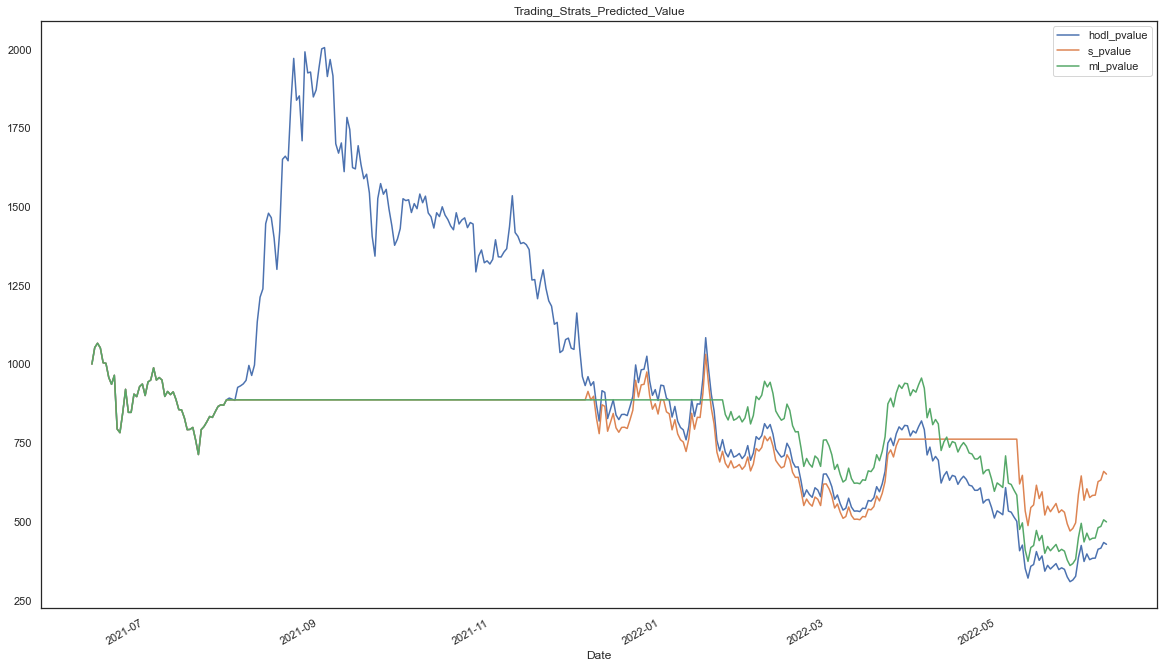

In [41]:
dfv = df_ada[["hodl_pvalue", "s_pvalue", "ml_pvalue"]]
trading_strats_pvalue = dfv.plot(figsize=png_figsize)
save_as_png("Trading_Strats_Predicted_Value", trading_strats_pvalue)

dfv.hvplot()

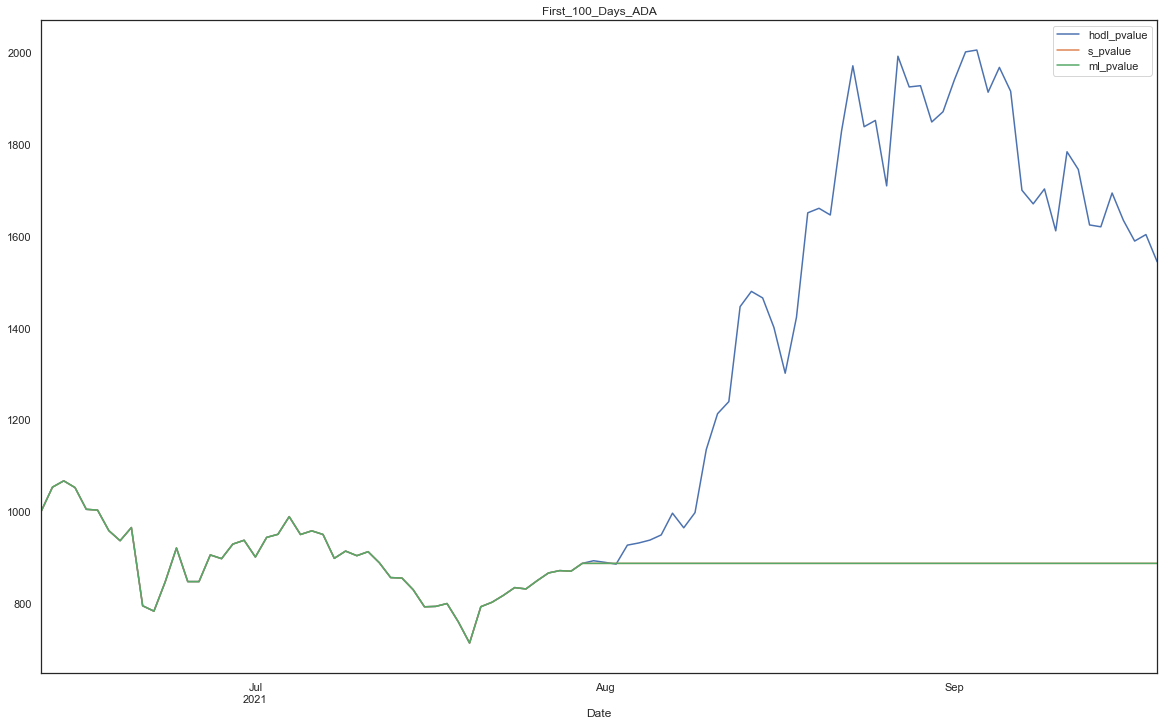

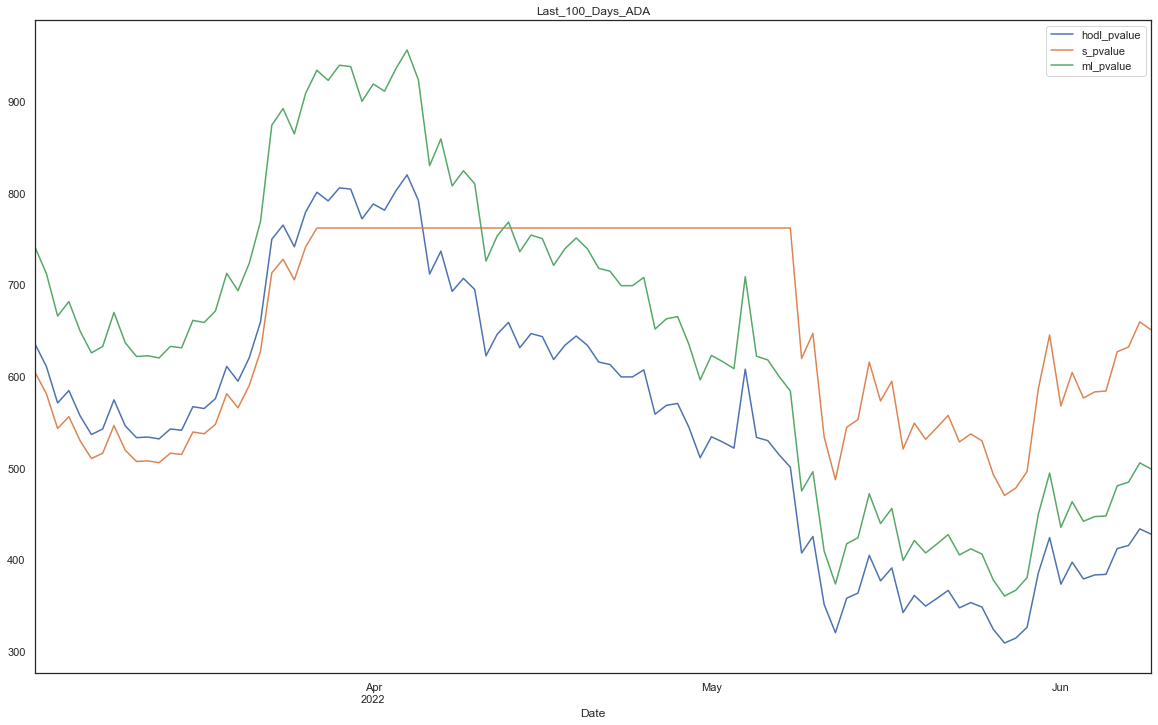

In [42]:
dfv_first_100 = df_ada[["hodl_pvalue", "s_pvalue", "ml_pvalue"]].head(100)
dfv_last_100 = df_ada[["hodl_pvalue", "s_pvalue", "ml_pvalue"]].tail(100)
first_100 = dfv_first_100.plot(figsize=png_figsize)
last_100 = dfv_last_100.plot(figsize=png_figsize)

save_as_png("First_100_Days_ADA", first_100)
save_as_png("Last_100_Days_ADA", last_100)

In [43]:
hodl_qty_ada_start = df_ada.s_dollars[0] / df_ada.ADA_close[0]
hodl_value_final = hodl_qty_ada_start * df_ada.ADA_close[-1]

s_value_final = df_ada.s_ada_qty[-1] * df_ada.ADA_close[-1]
ml_value_final = df_ada.ml_ada_qty[-1]  * df_ada.ADA_close[-1]



fspv = df_ada.s_pvalue[-1]
fmlpv = df_ada.ml_pvalue[-1]
fhpv = df_ada.hodl_pvalue[-1]

print(f"simple strategy value:  \t ${fspv:0.2f}")
print(f"machine learning strategy value: ${fmlpv:0.2f}")
print(f"HODL strategy value:  \t\t ${fhpv:0.2f}")

simple strategy value:  	 $650.45
machine learning strategy value: $498.60
HODL strategy value:  		 $427.55


In [44]:
df_ada

FG_index  ADA_close    ADA_volume  ADA_searches  s_signal  \
Date                                                                    
2021-06-12        23     1.4789  3.629652e+08             1         0   
2021-06-13        28     1.5566  3.307223e+08             1         0   
2021-06-14        38     1.5769  2.807912e+08             1         0   
2021-06-15        33     1.5552  2.161591e+08             1         0   
2021-06-16        26     1.4851  2.035805e+08             1         0   
...              ...        ...           ...           ...       ...   
2022-06-05        13     0.5674  9.527759e+07             1         1   
2022-06-06        15     0.6091  3.415024e+08             2         1   
2022-06-07        17     0.6141  3.388123e+08             2         0   
2022-06-08        11     0.6408  3.942674e+08             2         1   
2022-06-09        13     0.6323  1.923109e+08             0         1   

            actual_returns  ml_signal s_ada_qty ml_ada_qty s_dollars  \
Date                                                                   
2021-06-12        0.029086          0   676.178    676.178         0   
2021-06-13        0.052539          0   676.178    676.178         0   
2021-06-14        0.013041          0   676.178    676.178         0   
2021-06-15       -0.013761          0   676.178    676.178         0   
2021-06-16       -0.045075          0   676.178    676.178         0   
...                    ...        ...       ...        ...       ...   
2022-06-05        0.001589          1   1028.71    788.554         0   
2022-06-06        0.073493          1   1028.71    788.554         0   
2022-06-07        0.008209          1   1028.71    788.554         0   
2022-06-08        0.043478          1   1028.71    788.554         0   
2022-06-09       -0.013265          1   1028.71    788.554         0   

           ml_dollars s_pvalue ml_pvalue hodl_pvalue  
Date                                                  
2021-06-12          0     1000      1000        1000  
2021-06-13          0  1052.54   1052.54     1052.54  
2021-06-14          0  1066.27   1066.27     1066.27  
2021-06-15          0  1051.59   1051.59     1051.59  
2021-06-16          0  1004.19   1004.19     1004.19  
...               ...      ...       ...         ...  
2022-06-05          0  583.689   447.425     383.664  
2022-06-06          0  626.586   480.308      411.86  
2022-06-07          0   631.73   484.251     415.241  
2022-06-08          0  659.196   505.305     433.295  
2022-06-09          0  650.452   498.603     427.548  

[364 rows x 14 columns]

## ***(Incomplete) SMA Trading Strategy***

In [45]:
short_window = 50
long_window = 100

signals_df = df_ada.loc[:,['ADA_close']]

signals_df

ADA_close
Date                 
2021-06-12     1.4789
2021-06-13     1.5566
2021-06-14     1.5769
2021-06-15     1.5552
2021-06-16     1.4851
...               ...
2022-06-05     0.5674
2022-06-06     0.6091
2022-06-07     0.6141
2022-06-08     0.6408
2022-06-09     0.6323

[364 rows x 1 columns]

In [46]:
short_window = 50
long_window = 100

signals_df = df_ada.loc[:,['ADA_close']]

# Generate the short and long moving averages (50 and 100 days, respectively)
signals_df['SMA50'] = signals_df['ADA_close'].rolling(window=short_window).mean()
signals_df['SMA100'] = signals_df['ADA_close'].rolling(window=long_window).mean()


# Review the DataFrame
signals_df.tail()

ADA_close     SMA50    SMA100
Date                                     
2022-06-05     0.5674  0.674314  0.823477
2022-06-06     0.6091  0.668216  0.820698
2022-06-07     0.6141  0.661758  0.818279
2022-06-08     0.6408  0.655534  0.815067
2022-06-09     0.6323  0.649440  0.811760

In [47]:
# Generate the short and long moving averages (50 and 100 days, respectively)
signals_df['SMA50'] = signals_df['ADA_close'].rolling(window=short_window).mean()
signals_df['SMA100'] = signals_df['ADA_close'].rolling(window=long_window).mean()


# Review the DataFrame
signals_df.tail()

ADA_close     SMA50    SMA100
Date                                     
2022-06-05     0.5674  0.674314  0.823477
2022-06-06     0.6091  0.668216  0.820698
2022-06-07     0.6141  0.661758  0.818279
2022-06-08     0.6408  0.655534  0.815067
2022-06-09     0.6323  0.649440  0.811760

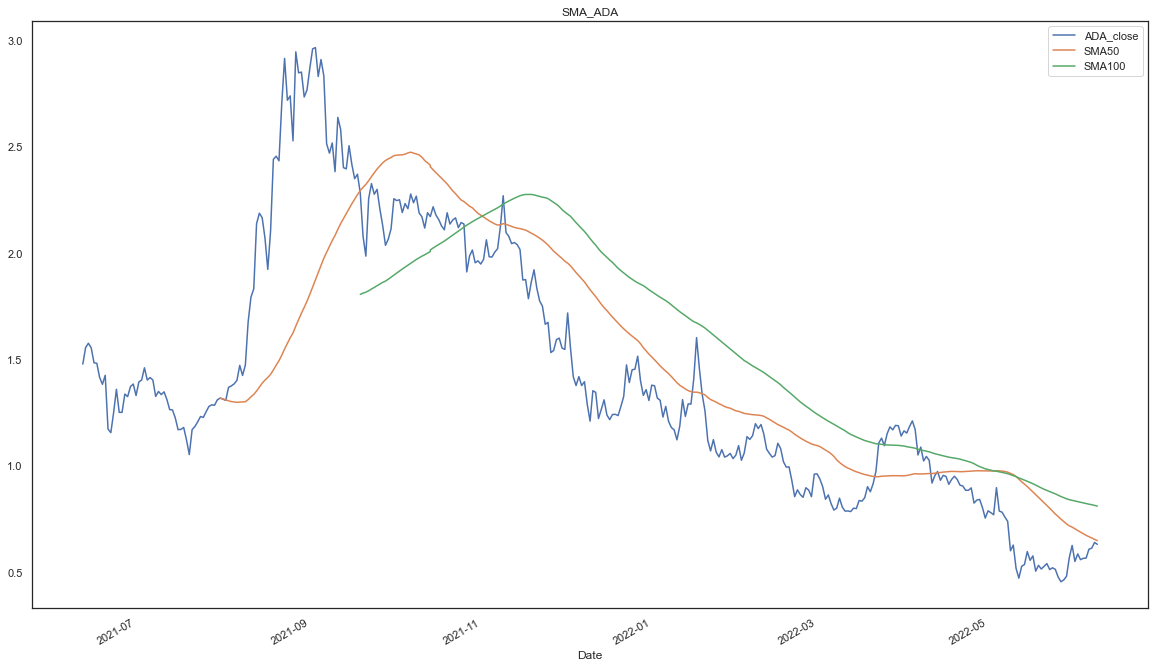

In [48]:
sma_signals = signals_df.plot(figsize=png_figsize)
save_as_png("SMA_ADA", sma_signals)

In [49]:
 # Initialize the new Signal column to hold the trading signal
signals_df['Signal'] = 0.0

In [50]:
 # Generate the trading signal 0 or 1,
# where 1 is the short-window (SMA50) is less than the long-window (SMA100)
signals_df["Signal"][short_window:] = np.where(
    signals_df["SMA50"][short_window:] < signals_df["SMA100"][short_window:], 1.0, 0.0
)

# Review the DataFrame
signals_df.iloc[95:105,:]

ADA_close     SMA50    SMA100  Signal
Date                                             
2021-09-15      2.505  2.209722       NaN     0.0
2021-09-16      2.417  2.232312       NaN     0.0
2021-09-17      2.350  2.253600       NaN     0.0
2021-09-18      2.371  2.274804       NaN     0.0
2021-09-19      2.283  2.294078  1.806427     0.0
2021-09-20      2.079  2.309374  1.812428     0.0
2021-09-21      1.986  2.322928  1.816722     0.0
2021-09-22      2.257  2.340676  1.823523     0.0
2021-09-23      2.327  2.359686  1.831241     0.0
2021-09-24      2.277  2.377508  1.839160     0.0

In [51]:
# Calculate the points in time at which a position should be taken, 1 or -1
signals_df['Entry/Exit'] = signals_df['Signal'].diff()

# Review the DataFrame
signals_df.dropna(inplace=True)
signals_df

ADA_close     SMA50    SMA100  Signal  Entry/Exit
Date                                                         
2021-09-19     2.2830  2.294078  1.806427     0.0         0.0
2021-09-20     2.0790  2.309374  1.812428     0.0         0.0
2021-09-21     1.9860  2.322928  1.816722     0.0         0.0
2021-09-22     2.2570  2.340676  1.823523     0.0         0.0
2021-09-23     2.3270  2.359686  1.831241     0.0         0.0
...               ...       ...       ...     ...         ...
2022-06-05     0.5674  0.674314  0.823477     1.0         0.0
2022-06-06     0.6091  0.668216  0.820698     1.0         0.0
2022-06-07     0.6141  0.661758  0.818279     1.0         0.0
2022-06-08     0.6408  0.655534  0.815067     1.0         0.0
2022-06-09     0.6323  0.649440  0.811760     1.0         0.0

[265 rows x 5 columns]

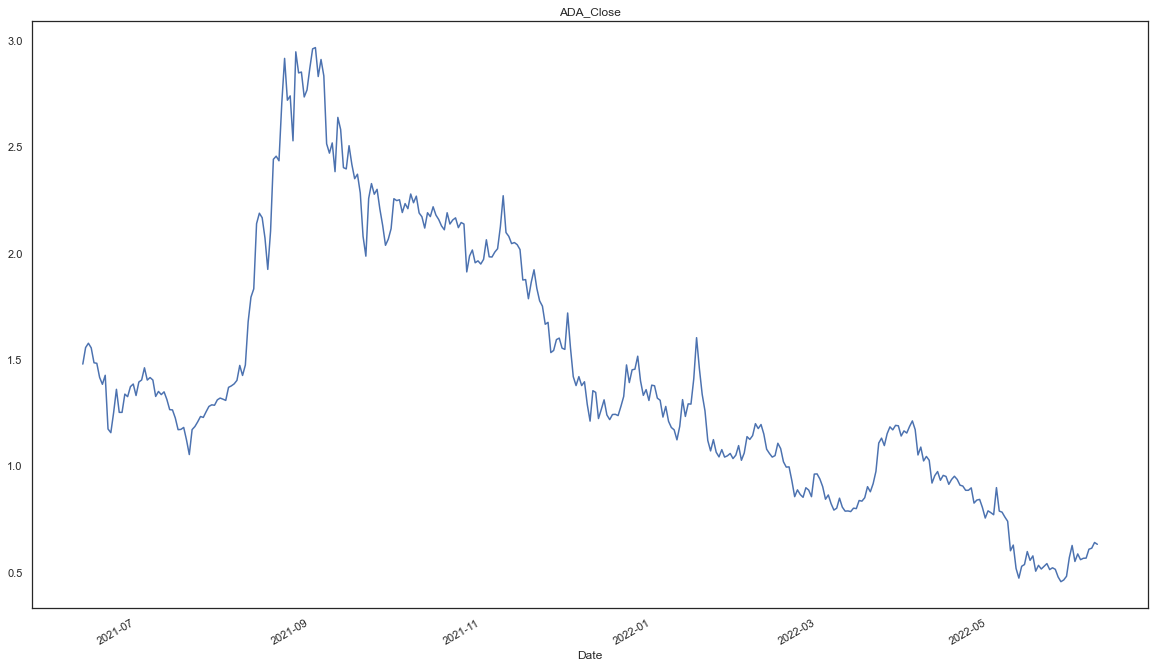

In [52]:
close = df_ada.ADA_close

close.hvplot.scatter(
    color='purple',
    marker='^',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

close.hvplot()
ada_close = close.plot(figsize=png_figsize)
save_as_png("ADA_Close", ada_close)

In [53]:
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['ADA_close']
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['ADA_close']

display(entry)
display(exit)

Date
2021-11-02    1.9710
2022-05-12    0.4733
Name: ADA_close, dtype: float64

Date
2022-05-04    0.8985
Name: ADA_close, dtype: float64

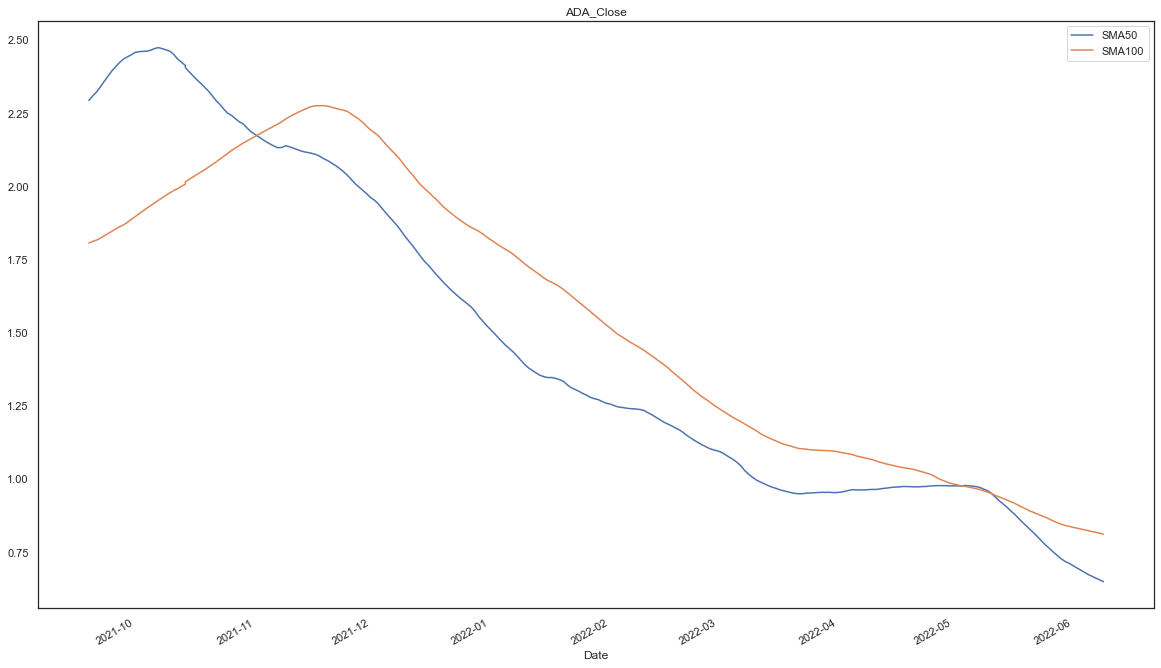

In [54]:
# Visualize the SMA50 and SMA 100 moving averages
moving_avgs = signals_df[['SMA50', 'SMA100']]
# moving_avgs.hvplot(
#     ylabel='Price in $',
#     width=20,
#     height=40)
moving_avgs.hvplot()

move_avg = moving_avgs.plot(figsize=png_figsize)
save_as_png("ADA_Close", move_avg)